# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

importar a pandas
Utilizar el método info ()


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep= ";")
products = pd.read_csv('/datasets/products.csv', sep= ";")
aisles = pd.read_csv('/datasets/aisles.csv', sep= ";")
departments = pd.read_csv('/datasets/departments.csv', sep= ";")
order_products = pd.read_csv('/datasets/order_products.csv', sep= ";")

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

No estaban correctamente separadas las columnas por lo que tuve que utilizar sep= ";", algunos documentos como ordes, products y order_products tienen valores nulos, lo cual será necesario para arreglarlo, la mayoría son archivos pequeños con la excepción de order_prodcuts y orders.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(orders[orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
#si hay 15 duplicados, todos se hicieron el miercoles antes de las 2 am.
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print (wednesday_2am_orders)
total_pedidos = len(wednesday_2am_orders)
print (total_pedidos)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

In [10]:
# Elimina los pedidos duplicados
orders_sin_duplicados = orders.drop_duplicates()

# Verificamos que se eliminaron
print(orders_sin_duplicados.shape)

(478952, 6)


In [11]:
# Número de filas antes de eliminar duplicados
print('Antes de eliminar duplicados:', orders.shape)

# Eliminamos duplicados
orders_sin_duplicados = orders.drop_duplicates()

# Número de filas después de eliminar duplicados
print('Después de eliminar duplicados:', orders_sin_duplicados.shape)

Antes de eliminar duplicados: (478967, 6)
Después de eliminar duplicados: (478952, 6)


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
# Verificamos si hay order_id duplicados
duplicados_order_id = orders_sin_duplicados['order_id'].duplicated()

# Contamos cuántos son True (es decir, cuántos order_id están duplicados)
print('Número de order_id duplicados:', duplicados_order_id.sum())

Número de order_id duplicados: 0


Se eliminaron todos los datos duplicados 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
duplicados = products.duplicated(subset='product_id').sum()
print(duplicados)


0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

products['product_name_upper'] = products['product_name'].str.upper()

duplicados_nombres = products['product_name_upper'].duplicated()

print('Número de nombres de productos duplicados:', duplicados_nombres.sum())

Número de nombres de productos duplicados: 1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products[(products['product_name_upper'].duplicated()) & ~(products['product_name_upper'].isna())]

,product_id,product_name,aisle_id,department_id,product_name_upper
2058,2059,Biotin 1000 Mcg,47,11,BIOTIN 1000 MCG
5455,5456,Green Tea With Ginseng and Honey,96,20,GREEN TEA WITH GINSENG AND HONEY
5558,5559,Cream Of Mushroom Soup,69,15,CREAM OF MUSHROOM SOUP
7558,7559,Cinnamon Rolls with Icing,105,13,CINNAMON ROLLS WITH ICING
9037,9038,American Cheese slices,21,16,AMERICAN CHEESE SLICES
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,HIGH PERFORMANCE ENERGY DRINK
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,ORIGINAL PANCAKE & WAFFLE MIX
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692,49693,SPRING WATER BODY WASH,127,11,SPRING WATER BODY WASH


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs departmentos duplicados
duplicados_department_id = departments['department_id'].duplicated()

# Contamos cuántos son duplicados
print('Número de department_id duplicados:', duplicados_department_id.sum())
#departments[departments.duplicated(subset='department_id')]

Número de department_id duplicados: 0


No hay duplicados por ende no fue necesario eliminar o cambiar algo DF

### `aisles` data frame

In [19]:
print((aisles.duplicated().sum()))

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
duplicados_aisle_id = aisles['aisle_id'].duplicated()

# Contamos cuántos son duplicados
print('Número de aisle_id duplicados:', duplicados_aisle_id.sum())

Número de aisle_id duplicados: 0


No hay duplicados por ende no es necesario cambiar algo del DF


### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print((order_products.duplicated().sum()))

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
orders.duplicated(subset='order_id')

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool

Los duplicados fueron eliminados 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
productos_sin_nombre = products[products['product_name'].isna()]
print (productos_sin_nombre)

       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


Tenemos 1258 datos ausentes en la columna product_name y estan relacionados con la columna aisle_id 100 y con el department_id 21

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
todos_en_aisle_100 = (productos_sin_nombre['aisle_id'] == 100).all()
print(todos_en_aisle_100)

True


Así es todos los productos faltantes están relacionados con el pasillo 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
todos_en_departamento_21 = (productos_sin_nombre['department_id'] == 21).all()
print(todos_en_departamento_21)

True


Así es todo los faltantes están relacionados con el departamento 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print("Información del pasillo con ID 100:")
print(aisles[aisles['aisle_id'] == 100])

print("\nInformación del departamento con ID 21:")
# Revisar datos del departamento con ID 21
print(departments[departments['department_id'] == 21])

Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# Verifica si se completaron correctamente
print(products['product_name'].isna().sum()) 

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
primeras_ordenes=orders[orders['days_since_prior_order']!=0]
print(primeras_ordenes.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


No, ya que todo los valores nulos pertenecen a la primera orden. 

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
minimo = order_products['add_to_cart_order'].min()
maximo = order_products['add_to_cart_order'].max()

print("Mínimo:", minimo)
print("Máximo:", maximo)

Mínimo: 1.0
Máximo: 64.0


Solo hay datos ausentes en la columna add_to_cart_order

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
faltantes_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]

# 2. Seleccionamos la columna 'order_id'
order_ids_faltantes = faltantes_add_to_cart['order_id']

# 3. (Opcional) Si quieres verlo como una lista
order_ids_faltantes_list = order_ids_faltantes.tolist()

# Imprimir el resultado
print(order_ids_faltantes)


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
faltantes_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]
conteo_productos_por_pedido = faltantes_add_to_cart.groupby('order_id')['product_id'].count()
min_productos = conteo_productos_por_pedido.min()
print(min_productos)

1


Describe brevemente cuáles son tus hallazgos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
print(order_products['add_to_cart_order'].isna().sum())  
print(order_products['add_to_cart_order'].dtype)         

0
int64


se sustituyeron los valores con 999 como se había indicado, además de que se convirtió la columna de flotante a entero. 

## Conclusiones

Durante el análisis de los DataFrames (orders, departments, order_products), se eliminaron duplicados, se identificaron y corrigieron valores faltantes, y se confirmaron patrones lógicos como la ausencia de days_since_prior_order en primeros pedidos. También se resolvieron inconsistencias relacionadas con nombres de productos faltantes, asociados a IDs de pasillo y departamento "missing", reemplazándolos por "Unknown". En order_products, se detectaron valores nulos en add_to_cart_order, se agruparon los pedidos afectados, y se corrigieron asignando 999 y convirtiendo el dato a entero. En general, se limpiaron y estandarizaron los datos, dejándolos listos para análisis más avanzados como modelado o visualización de patrones de compra.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(orders['order_hour_of_day'].min())
print(orders['order_hour_of_day'].max())


0
23


In [36]:
print(orders['order_dow'].min())
print(orders['order_dow'].max())

0
6


Podemos decir que los valores si son razonables pues se encuentran en los parámetros solicitados. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [37]:
pedidos_por_hora = orders['order_hour_of_day'].value_counts().sort_index()
pedidos_por_hora


0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

<AxesSubplot:title={'center':'pedidos por hora'}, xlabel='horas del día', ylabel='total de ordenes'>

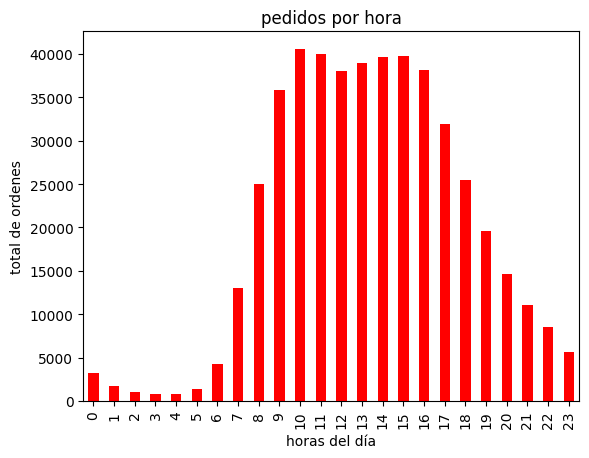

In [38]:
pedidos_por_hora.plot(title= 'pedidos por hora',kind='bar', xlabel= 'horas del día', ylabel= 'total de ordenes', color= 'red')

Que la mayoría de las ventas suceden entre las horas 8 y 17 horas. 

### [A3] ¿Qué día de la semana compran víveres las personas?

In [39]:
ventas_por_dia = orders['order_dow'].value_counts().sort_index()
ventas_por_dia

0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

<AxesSubplot:title={'center':'ventas por día'}, xlabel='días de la semana', ylabel='total de ordenes'>

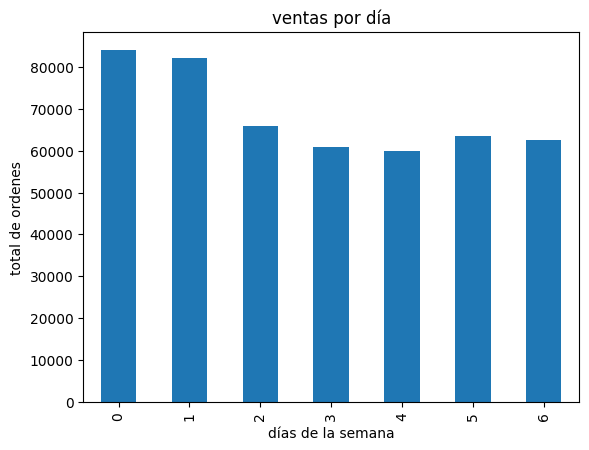

In [40]:
ventas_por_dia.plot(title= 'ventas por día', kind= 'bar', xlabel='días de la semana', ylabel= 'total de ordenes')

Los días que mas consumen los clientes son los domingos y lunes, en cambio baja las ventas los días miercoles y jueves. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [77]:
tiempo_de_espera= orders['days_since_prior_order'].value_counts().sort_index()
tiempo_de_espera


0.0      9589
1.0     20179
2.0     27141
3.0     30225
4.0     31007
5.0     30096
6.0     33931
7.0     44579
8.0     25361
9.0     16754
10.0    13310
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6588
17.0     5498
18.0     4972
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51338
Name: days_since_prior_order, dtype: int64

<AxesSubplot:title={'center':'tiempo de espera hasta hacer otro pedido'}, xlabel='días', ylabel='total de ordenes'>

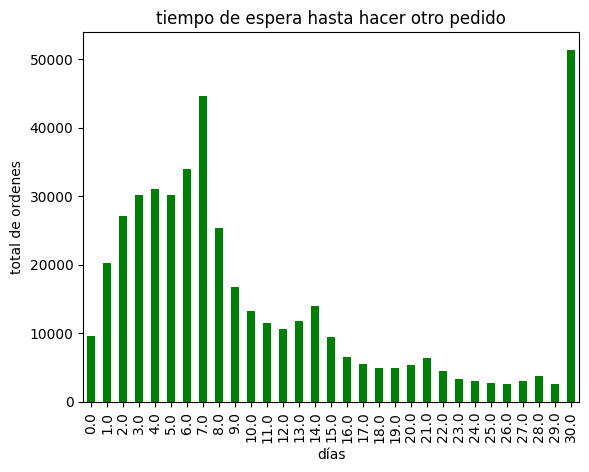

In [42]:
tiempo_de_espera.plot(title= 'tiempo de espera hasta hacer otro pedido', kind= 'bar', xlabel='días', ylabel= 'total de ordenes', color='green')

Se puede ver que el valor mínimo es 25 y el máximo 30, la mayoría de las personas piensan hacer su pedido hasta el día 30, mientras que el mínimo es 26

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
wed = orders[orders['order_dow'] == 3]
sat = orders[orders['order_dow'] == 5]

In [44]:
# Contar pedidos por hora
wed_counts = wed['order_hour_of_day'].value_counts().sort_index()
sat_counts = sat['order_hour_of_day'].value_counts().sort_index()


In [45]:
# Crear DataFrame combinado
df = pd.DataFrame({
    'Miércoles': wed_counts,
    'Sábado': sat_counts
}).fillna(0)

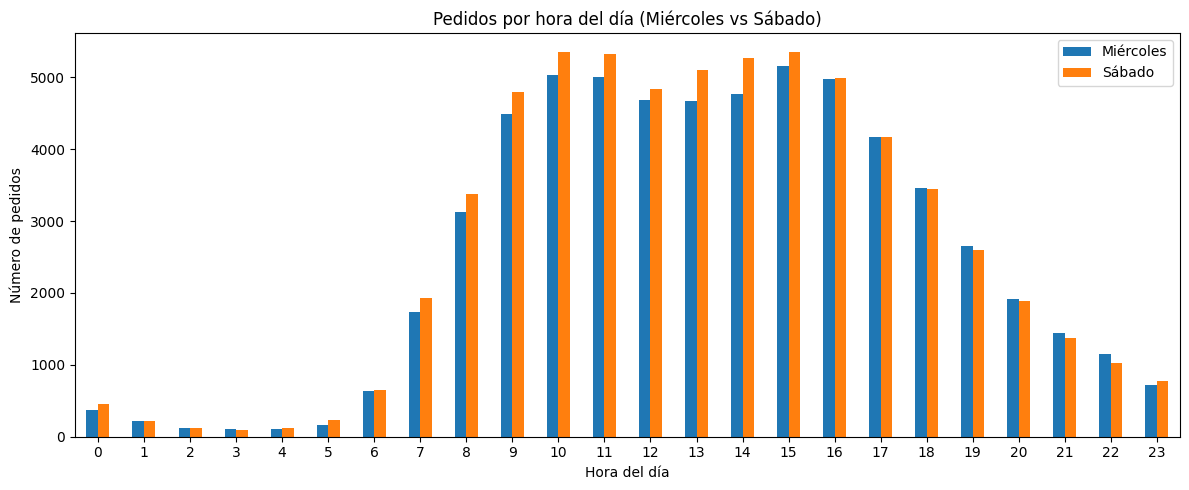

In [46]:
# Graficar barras agrupadas
df.plot(kind='bar', figsize=(12, 5))
plt.title('Pedidos por hora del día (Miércoles vs Sábado)')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

Se puede observar que la mayoría de los pedidos se hacen entre las horas 7 a las 23 horas, los días sabado son mas solicitados que los miercoles. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [81]:
order_counts = orders.groupby('user_id')['order_number'].max()
distribucion = order_counts.value_counts().sort_index()

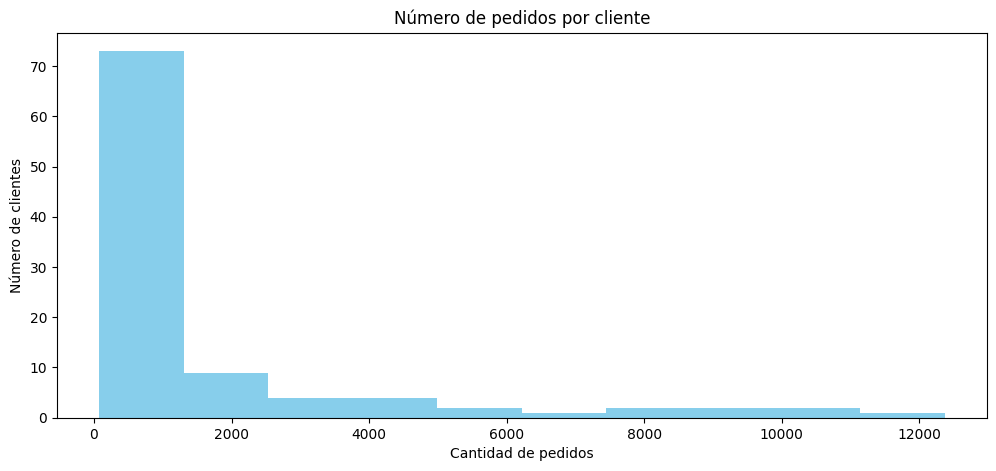

In [82]:
order_counts.value_counts().sort_index().plot(kind='hist', figsize=(12,5), color='skyblue')
plt.title('Número de pedidos por cliente')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Número de clientes')
plt.show()

La mayoría de los clientes realizan pocos pedidos, mientras que solo unos pocos son responsables de una gran cantidad de ellos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [48]:
top_products = (
    order_products['product_id']
    .value_counts()
    .head(20)
    .reset_index()
    .rename(columns={'index': 'product_id', 'product_id': 'count'})
)

In [49]:
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

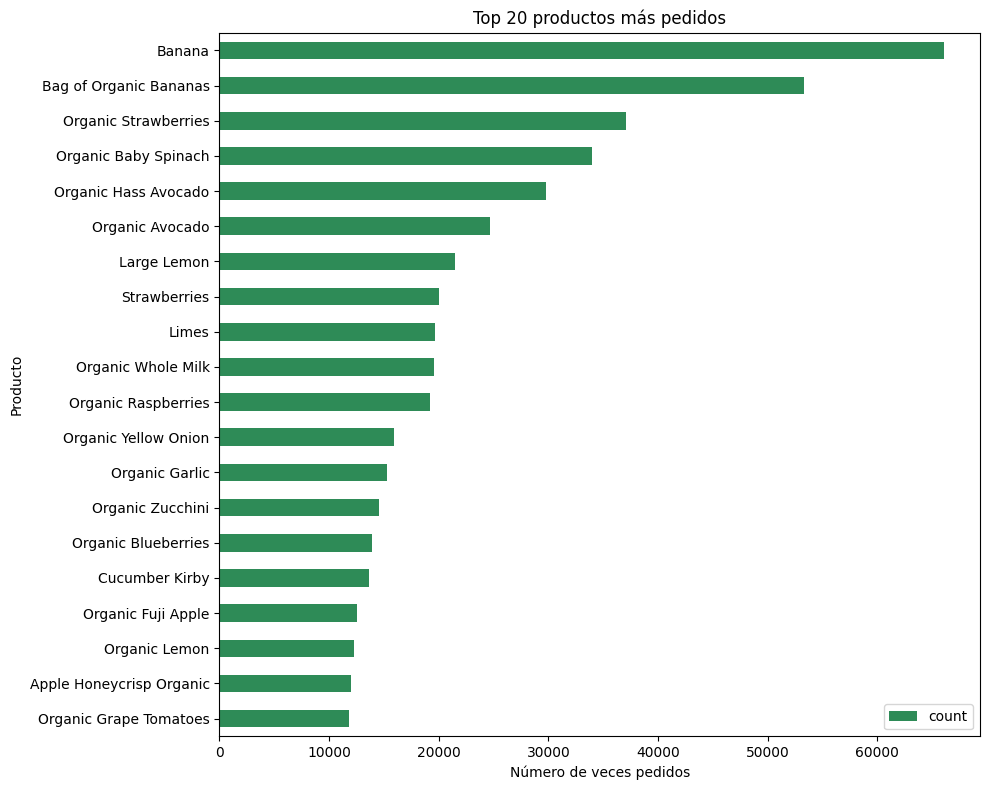

In [50]:
top_products.sort_values('count').plot(
    kind='barh', x='product_name', y='count', figsize=(10, 8), color='seagreen'
)
plt.title('Top 20 productos más pedidos')
plt.xlabel('Número de veces pedidos')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


Se puede ver que las bananas son de los productos mas consumidos por las personas, podemos observar que la mayoría de los productos más consumidos son las frutas y vegetales. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [51]:
articulos_comprados =order_products.groupby('order_id')['product_id'].count()
articulos_comprados.mean()

10.098983215049127

In [52]:
print(articulos_comprados )

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


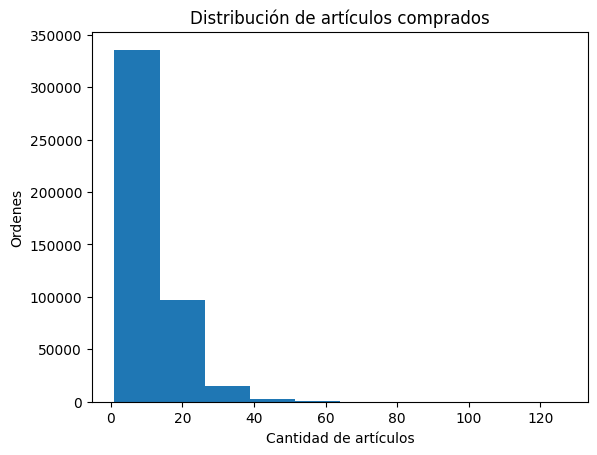

In [53]:
plt.hist(articulos_comprados)
plt.title('Distribución de artículos comprados')
plt.xlabel('Cantidad de artículos')
plt.ylabel('Ordenes')
plt.show()

El promedio de los articulos que se compran son 10, pero se puede ver que la mayoría de las personas compran de 20 a 40 artículos. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [57]:
products.merge(order_products,on ='product_id')

,product_id,product_name,aisle_id,department_id,product_name_upper,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES,1104373,11,1
1,1,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES,1774977,4,1
2,1,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES,652770,10,0
3,1,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES,1000035,6,1
4,1,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES,1679949,9,0
...,...,...,...,...,...,...,...,...
4545002,49694,BURRITO- STEAK & CHEESE,38,1,BURRITO- STEAK & CHEESE,3034802,10,0
4545003,49694,BURRITO- STEAK & CHEESE,38,1,BURRITO- STEAK & CHEESE,3175081,3,0
4545004,49694,BURRITO- STEAK & CHEESE,38,1,BURRITO- STEAK & CHEESE,694132,2,0
4545005,49694,BURRITO- STEAK & CHEESE,38,1,BURRITO- STEAK & CHEESE,2843165,5,0


In [58]:
articulos_mas_comprados = order_products.groupby('product_id')['reordered'].sum().reset_index()

In [59]:
articulos_nombrados= articulos_mas_comprados.merge(products[['product_id','product_name']], on='product_id', how='left')

In [60]:
articulos_nombrados.sort_values('reordered',ascending=False).head(20)

,product_id,reordered,product_name
22808,24852,55763,Banana
12025,13176,44450,Bag of Organic Bananas
19370,21137,28639,Organic Strawberries
20077,21903,26233,Organic Baby Spinach
43271,47209,23629,Organic Hass Avocado
43788,47766,18743,Organic Avocado
25556,27845,16251,Organic Whole Milk
43663,47626,15044,Large Lemon
25666,27966,14748,Organic Raspberries
15364,16797,13945,Strawberries


Para resolver este caso, tuvimos que estraer los id de los productos y los productos que se habian reordenados, para despues fusionarlos con el data frame de productos, ya que este documento poseía los nombres de los productos, por lo tanto solo tuvimos que fusionar tomando en base a la columna product_name. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [74]:
tabla_nueva= products.merge(order_products, on='product_id')

In [75]:
tabla_nueva.groupby(['product_id','product_name'])['reordered'].mean().sort_values(ascending=False).head(20)

product_id  product_name                                                        
14721       Bone Strength Take Care                                                 1.0
20949       Vanilla Sandwich Cookies                                                1.0
6723        Palmiers- Petite                                                        1.0
6732        Naturally Sparkling Mineral Water                                       1.0
45088       California Dill Pollen & Garlic Goat Cheese & Olive Oil Infusion        1.0
45078       Pomegranatea                                                            1.0
21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans                            1.0
21005       Peanut Butter Pie Ice Cream                                             1.0
35192       Chocolate Soy Milk Singles                                              1.0
35197       Mocha Chocolate Chip  Organic Non-Dairy Frozen Dessert                  1.0
6810        Raspberry Goji Paleo Prints

Se puede observar que hay una fidelidad a muchos porductos pues la tasa de reordenamientos es de 100 y que hay una diversidad de productos pues no hay uno solo que encabece la lista. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [83]:
order_products_users = order_products.merge(orders[['order_id', 'user_id']], on='order_id')

user_reorder_stats = order_products_users.groupby('user_id').agg(
    total_products=('reordered', 'count'),
    total_reordered=('reordered', 'sum')
)

user_reorder_stats['repeat_rate'] = user_reorder_stats['total_reordered'] / user_reorder_stats['total_products']
user_reorder_stats = user_reorder_stats.sort_values(by='repeat_rate', ascending=False)
print(user_reorder_stats.head(10))

         total_products  total_reordered  repeat_rate
user_id                                              
96430                 5                5          1.0
69003                 4                4          1.0
199910                3                3          1.0
203290                6                6          1.0
140076                1                1          1.0
87731                 6                6          1.0
69010                 3                3          1.0
179451                5                5          1.0
197349               15               15          1.0
172208                7                7          1.0


Este conjunto de datos muestra que todos los usuarios tienen un repeat_rate de 1.0, indicando que repiten exactamente los mismos productos en cada pedido, lo que sugiere un comportamiento de compra muy consistente y predecible.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [72]:
variable_nueva = products.merge(order_products, on='product_id')

In [73]:
filtrar_productos= variable_nueva[variable_nueva['add_to_cart_order'] == 1]
df_new_order_prod= filtrar_productos.groupby(['product_id','product_name'])['add_to_cart_order'].count().sort_values(ascending=False).head(20)
df_new_order_prod

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

Los productos más agregados al carrito son principalmente frutas, lácteos y artículos orgánicos de consumo básico, lo que refleja hábitos de compra frecuentes y una alta preferencia por alimentos saludables

### Conclusion general del proyecto:

In [ ]:
Es un proyecto complejo que muestra la importancia de limpiar duplicados, limpiar ausentes, para que se pueda graficar de manera acorde el proyecto sin cometer errores, en este proceso se tienen que fusionar las tablas para poder obtener lo que se solicita y despues podamos graficar de manera correcta sin errores. 